     product  total_qty  revenue
0  Product A         25    125.0
1  Product B         17    170.0
2  Product C          8     96.0


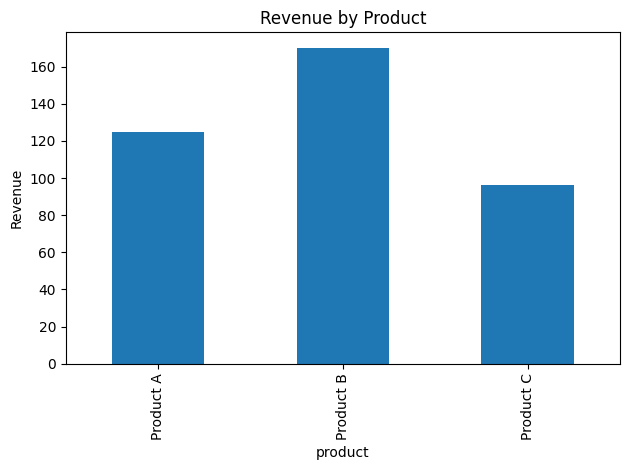

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert some sample data into the sales table
sample_data = [
    ('Product A', 10, 5.00),
    ('Product B', 5, 10.00),
    ('Product A', 15, 5.00),
    ('Product C', 8, 12.00),
    ('Product B', 12, 10.00),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Commit the changes
conn.commit()

# Step 2: SQL query to aggregate quantity and revenue per product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product
"""

# Step 3: Load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Step 4: Print the results
print(df)

# Step 5: Plot bar chart (product vs. revenue)
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()

# Step 6: Save chart as PNG
plt.savefig("sales_chart.png")

# Optional: Show plot
plt.show()

# Step 7: Close the connection
conn.close()